<h1>준비</h1>

In [12]:
data_path = './input/data/train' 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [14]:
import time
unix_time = 1230782529 # some random timestamp from dataset
converted_time = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(unix_time))

print ("initial unix-based timestamp: %s\nconverted time: %s"%(unix_time, converted_time))

initial unix-based timestamp: 1230782529
converted time: 2009-01-01 04:02:09


In [15]:
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv'))
year_data = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')
writer_data = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep='\t')
title_data = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep='\t')
genre_data = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')
director_data = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep='\t')


In [16]:
train_df['time_date'] = pd.to_datetime(train_df['time'], unit='s')
train_df['time_year'] = train_df['time_date'].dt.year
train_df['time_month'] = train_df['time_date'].dt.month
train_df['time_hour'] = train_df['time_date'].dt.hour
train_df['time_day'] = train_df['time_date'].dt.dayofweek

In [37]:
writer_df = pd.merge(train_df, writer_data, on=['item'])
director_df = pd.merge(train_df, director_data, on=['item'])
title_df = pd.merge(train_df, title_data, on=['item'])
genre_df = pd.merge(train_df, genre_data, on=['item'])

In [40]:
genre_data.sample(5)

,item,genre
8018,1367,Adventure
9881,36509,Adventure
3372,1949,Drama
11729,3591,Comedy
15561,2051,Children


In [17]:
train_df.sample(5)

,user,item,time,time_date,time_year,time_month,time_hour,time_day
25265,729,2628,1241020425,2009-04-29 15:53:45,2009,4,15,2
3124215,83396,6942,1329585709,2012-02-18 17:21:49,2012,2,17,5
1294643,34359,3735,1410006369,2014-09-06 12:26:09,2014,9,12,5
2863860,76501,27904,1176307037,2007-04-11 15:57:17,2007,4,15,2
4522969,120942,39449,1149389634,2006-06-04 02:53:54,2006,6,2,6


In [23]:
num_train_users = train_df['user'].nunique()
num_train_items = train_df['item'].nunique()

print ("Number of unique train users: ", num_train_users)
print ("Number of unique train items: ", num_train_items)

Number of unique train users:  31360
Number of unique train items:  6807


In [45]:
train_df.describe

<bound method NDFrame.describe of            user   item        time           time_date  time_year  time_month  \
0            11   4643  1230782529 2009-01-01 04:02:09       2009           1   
1            11    170  1230782534 2009-01-01 04:02:14       2009           1   
2            11    531  1230782539 2009-01-01 04:02:19       2009           1   
3            11    616  1230782542 2009-01-01 04:02:22       2009           1   
4            11   2140  1230782563 2009-01-01 04:02:43       2009           1   
...         ...    ...         ...                 ...        ...         ...   
5154466  138493  44022  1260209449 2009-12-07 18:10:49       2009          12   
5154467  138493   4958  1260209482 2009-12-07 18:11:22       2009          12   
5154468  138493  68319  1260209720 2009-12-07 18:15:20       2009          12   
5154469  138493  40819  1260209726 2009-12-07 18:15:26       2009          12   
5154470  138493  27311  1260209807 2009-12-07 18:16:47       2009          

In [76]:
every = pd.merge(train_df, writer_data, on=['item'])
every = pd.merge(every, director_data, on=['item'])
every = pd.merge(every, title_data, on=['item'])
every = pd.merge(every, genre_data, on=['item'])
every.sample(5)

,user,item,time,time_date,time_year,time_month,time_hour,time_day,writer,director,title,genre
9453669,4627,1,1288617939,2010-11-01 13:25:39,2010,11,13,0,nm0710020,nm0005124,Toy Story (1995),Animation
45816758,80668,2734,1125345826,2005-08-29 20:03:46,2005,8,20,0,nm0001707,nm0001837,"Mosquito Coast, The (1986)",Adventure
25140561,83234,1704,1297054618,2011-02-07 04:56:58,2011,2,4,0,nm0000354,nm0001814,Good Will Hunting (1997),Romance
38232884,18078,1374,1130170130,2005-10-24 16:08:50,2005,10,16,0,nm0071790,nm0583292,Star Trek II: The Wrath of Khan (1982),Adventure
7601200,119833,6377,1406775654,2014-07-31 03:00:54,2014,7,3,3,nm0721675,nm0881279,Finding Nemo (2003),Comedy


<h1>영화 side information 탐색 - 데이터는 약 5백만개, 사용자 약 31000명, 영화 약 6800개</h1>

In [54]:
train_df.count()

user          5154471
item          5154471
time          5154471
time_date     5154471
time_year     5154471
time_month    5154471
time_hour     5154471
time_day      5154471
dtype: int64

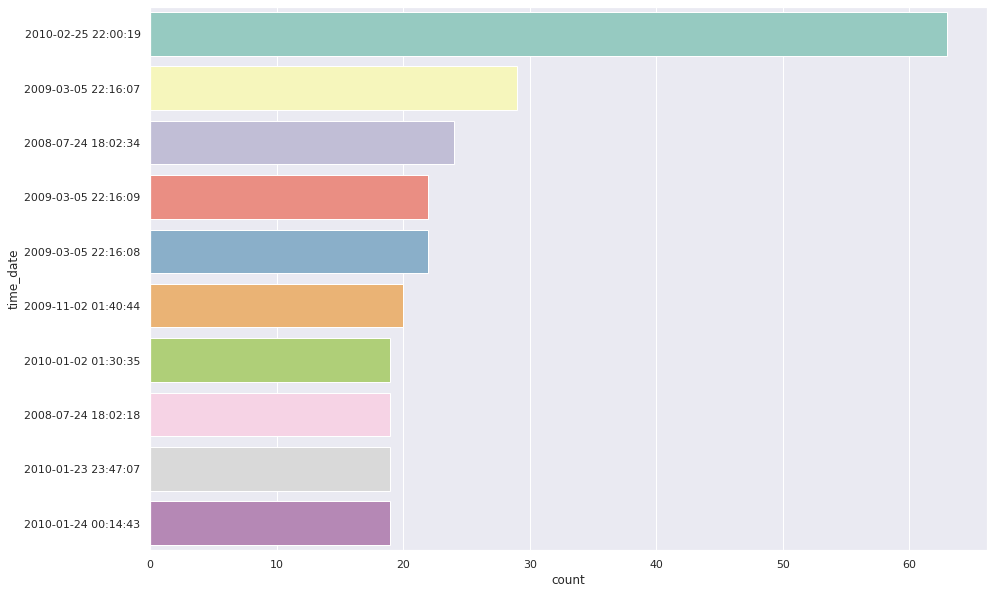

In [56]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="time_date", data=train_df, palette="Set3",\
                   order=train_df['time_date'].value_counts().index[0:10])

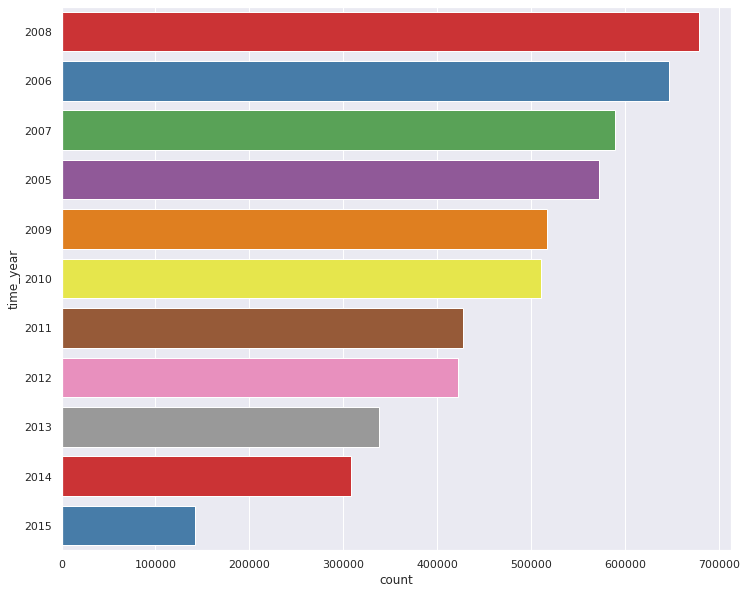

In [30]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="time_year", data=train_df, palette="Set1",\
                   order=train_df['time_year'].value_counts().index[0:20])

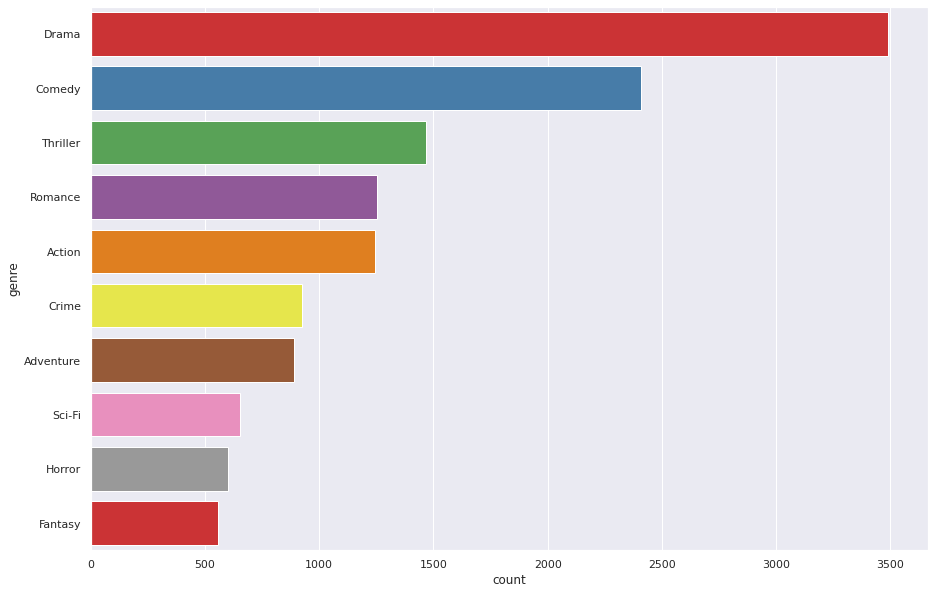

In [47]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="genre", data=genre_data, palette="Set1",\
                   order=genre_data['genre'].value_counts().index[0:10])

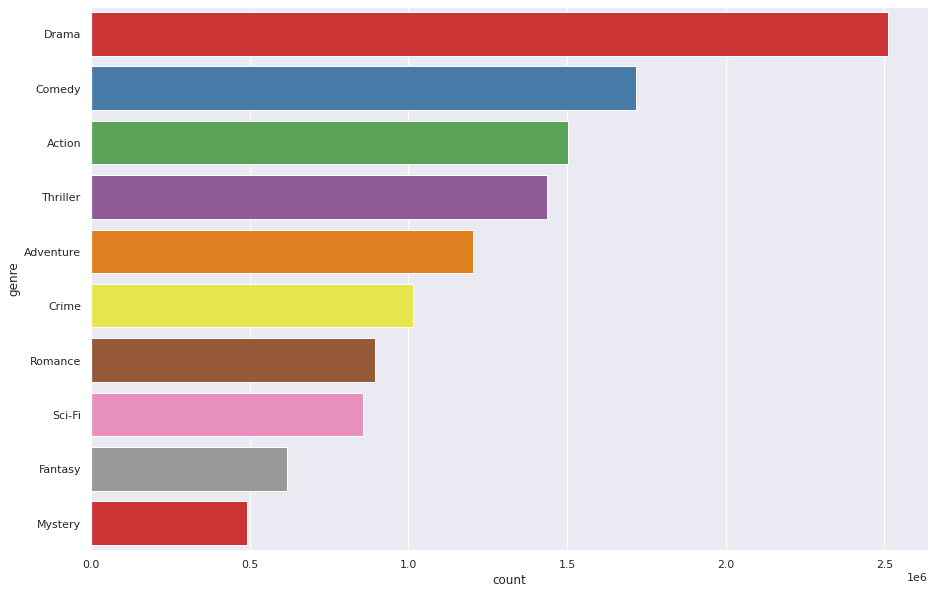

In [46]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="genre", data=genre_df, palette="Set1",\
                   order=genre_df['genre'].value_counts().index[0:10])

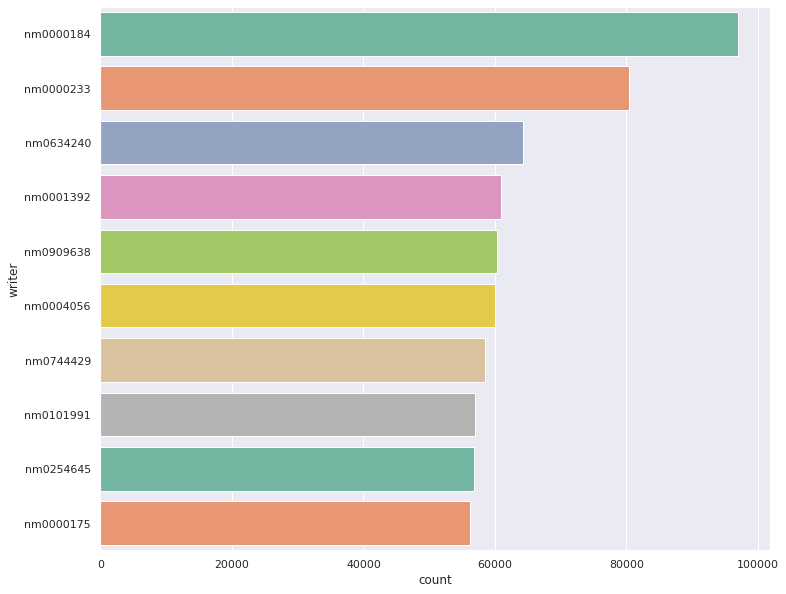

In [43]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="writer", data=writer_df, palette="Set2",\
                   order=writer_df['writer'].value_counts().index[0:10])

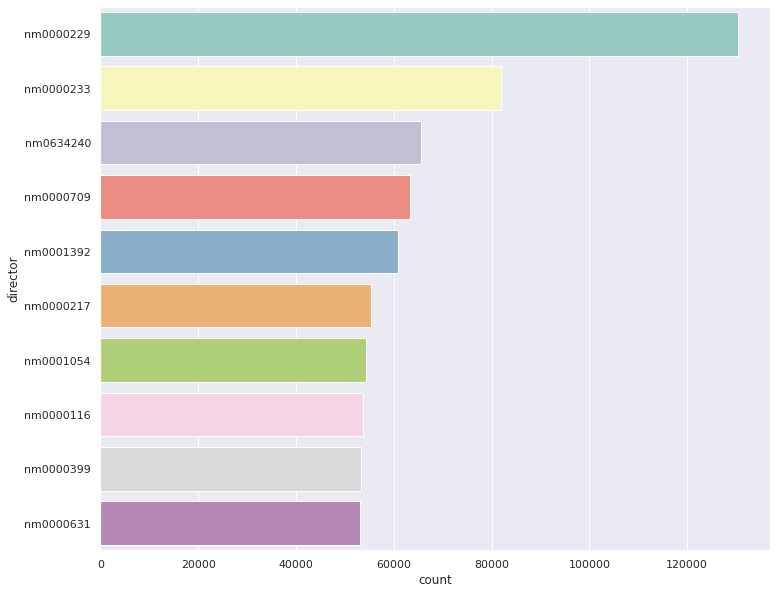

In [48]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="director", data=director_df, palette="Set3",\
                   order=director_df['director'].value_counts().index[0:10])

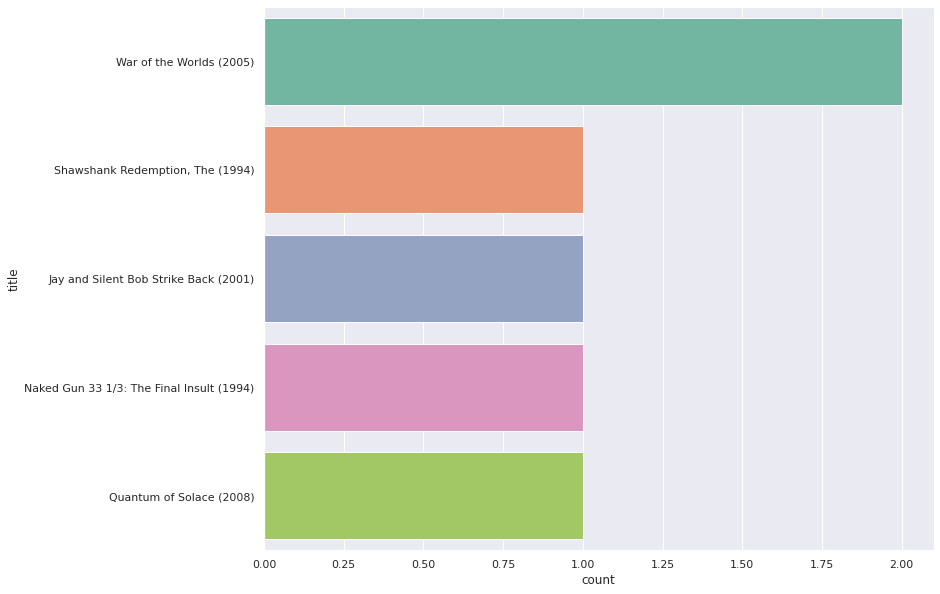

In [51]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="title", data=title_data, palette="Set2",\
                   order=title_data['title'].value_counts().index[0:5])

In [57]:
title_data['title'].value_counts()

War of the Worlds (2005)                     2
Shawshank Redemption, The (1994)             1
Jay and Silent Bob Strike Back (2001)        1
Naked Gun 33 1/3: The Final Insult (1994)    1
Quantum of Solace (2008)                     1
                                            ..
Brigadoon (1954)                             1
Son, The (Le fils) (2002)                    1
Secret Life of Walter Mitty, The (1947)      1
Them! (1954)                                 1
Girl Next Door, The (1999)                   1
Name: title, Length: 6806, dtype: int64

In [58]:
title_df['title'].value_counts()['War of the Worlds (2005)']

3200

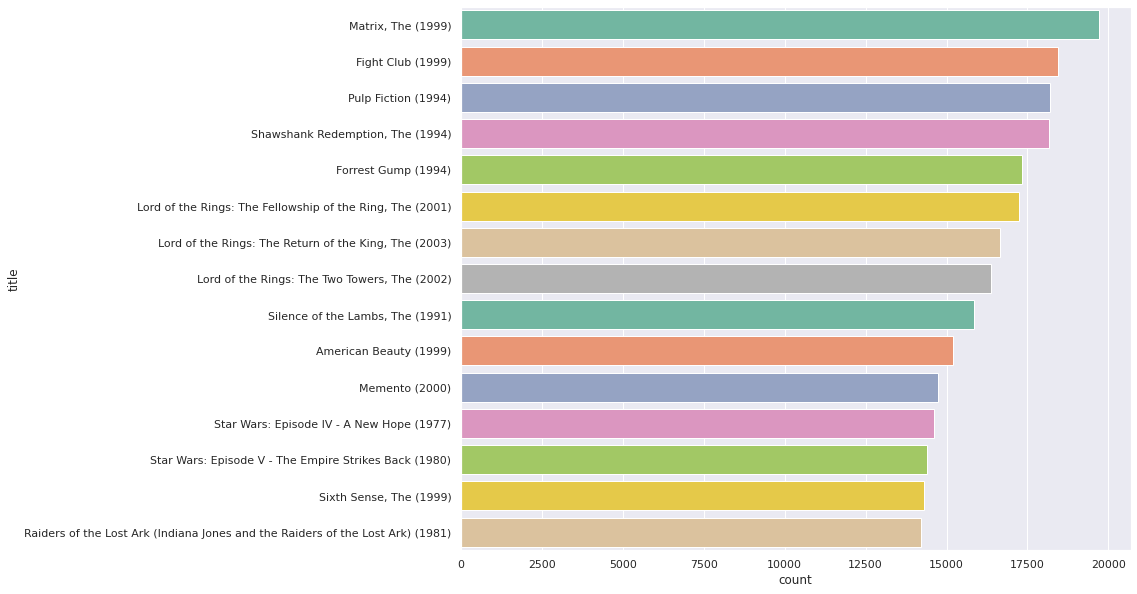

In [50]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="title", data=title_df, palette="Set2",\
                   order=title_df['title'].value_counts().index[0:15])

사용자별 탐색 - top 10

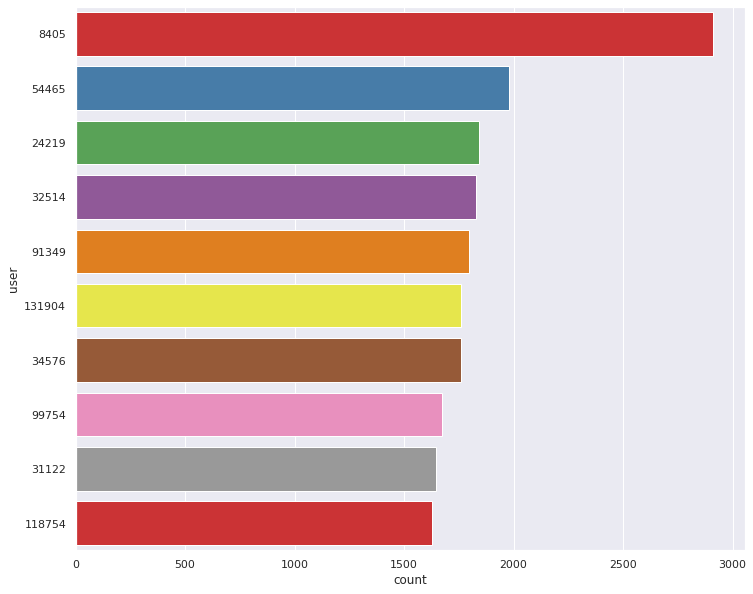

In [62]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="user", data=train_df, palette="Set1",\
                   order=train_df['user'].value_counts().index[0:10])

In [63]:
train_df['user'].value_counts()

8405      2912
54465     1980
24219     1842
32514     1830
91349     1795
          ... 
11211       32
128756      28
105578      22
68606       19
53188       16
Name: user, Length: 31360, dtype: int64

In [77]:
abusing = every[every['user'] == 8405]

In [78]:
abusing

,user,item,time,time_date,time_year,time_month,time_hour,time_day,writer,director,title,genre
18184,8405,531,1163393949,2006-11-13 04:59:09,2006,11,4,0,nm0003031,nm0002140,"Secret Garden, The (1993)",Children
18185,8405,531,1163393949,2006-11-13 04:59:09,2006,11,4,0,nm0003031,nm0002140,"Secret Garden, The (1993)",Drama
18186,8405,531,1163393949,2006-11-13 04:59:09,2006,11,4,0,nm0122364,nm0002140,"Secret Garden, The (1993)",Children
18187,8405,531,1163393949,2006-11-13 04:59:09,2006,11,4,0,nm0122364,nm0002140,"Secret Garden, The (1993)",Drama
22908,8405,616,1175050326,2007-03-28 02:52:06,2007,3,2,2,nm0027011,nm0718627,"Aristocats, The (1970)",Animation
...,...,...,...,...,...,...,...,...,...,...,...,...
46632654,8405,52528,1254039413,2009-09-27 08:16:53,2009,9,8,6,nm0701918,nm0000320,Tristana (1970),Drama
46632823,8405,86884,1336287444,2012-05-06 06:57:24,2012,5,6,6,nm0201094,nm0201094,"Kid With a Bike, The (Le gamin au vélo) (2011)",Drama
46632824,8405,86884,1336287444,2012-05-06 06:57:24,2012,5,6,6,nm0201094,nm0201095,"Kid With a Bike, The (Le gamin au vélo) (2011)",Drama
46632825,8405,86884,1336287444,2012-05-06 06:57:24,2012,5,6,6,nm0201095,nm0201094,"Kid With a Bike, The (Le gamin au vélo) (2011)",Drama


어뷰징의 영화 top 15

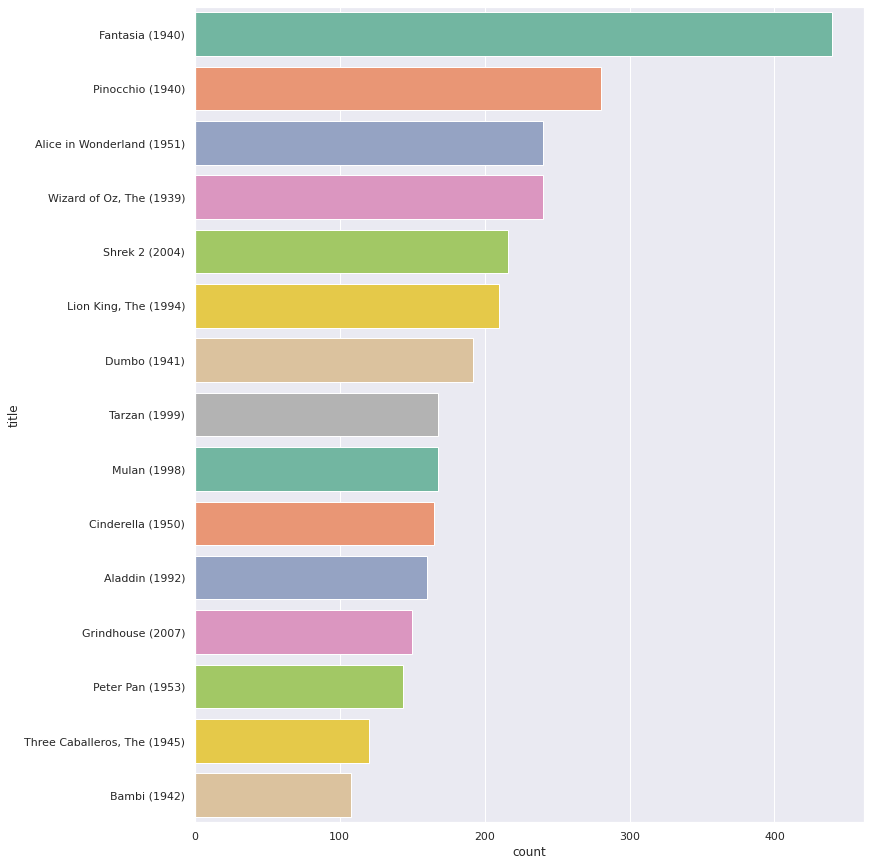

In [86]:
plt.figure(figsize=(12,15))
sns.set(style="darkgrid")
ax = sns.countplot(y="title", data=abusing, palette="Set2",\
                   order=abusing['title'].value_counts().index[0:15])

In [84]:
abusing['title'].value_counts()

Fantasia (1940)                        440
Pinocchio (1940)                       280
Alice in Wonderland (1951)             240
Wizard of Oz, The (1939)               240
Shrek 2 (2004)                         216
                                      ... 
Guess Who's Coming to Dinner (1967)      1
Extract (2009)                           1
Mon oncle d'Amérique (1980)              1
Gunfight at the O.K. Corral (1957)       1
Eight Men Out (1988)                     1
Name: title, Length: 2333, dtype: int64

어뷰징? 기간

In [89]:
base = pd.read_csv(os.path.join(data_path, 'train_ratings.csv'))
base.sample()

,user,item,time
3690094,98372,2961,1388177867


In [110]:
(base['user'].unique())

array([    11,     14,     18, ..., 138486, 138492, 138493])

In [96]:
max(base[base['user'] == 98372]['time'].unique())

1388787703

In [108]:
user = list(base['user'].unique())
user_set = set(user)
dur = {}
for u in user_set:
    print(u)
    l = base[base['user'] == u]['time'].unique()
    duration = max(l) - min(l)
    dur['u'] = duration

131080
131082
11
14
131087
18
131090
131091
131092
25
131100
131102
31
131104
35
131109
131111
131114
43
131115
131118
50
131126
131129
58
60
61
131132
65
131137
131138
131140
72
77
131153
82
131156
85
90
91
131162
131164
96
131168
98
99
131169
131173
102
131174
131177
131180
116
121
131193
124
131196
131200
129
131203
132
133
131204
135
136
131209
131210
131211
131212
131213
147
131221
152
154
155
131227
131228
162
163
131234
131239
168
131241
131242
131245
175
182
131255
189
190
131261
131263
131266
201
131275
204
205
206
208
209
131281
211
131284
213
215
218
220
131293
232
131308
237
239
241
248
131320
131321
131322
252
131323
254
131326
131327
258
131331
131333
264
266
131338
271
131347
279
131351
284
285
131360
131365
294
131366
131367
131372
131374
304
131379
131382
312
313
316
317
318
131389
131393
131400
131403
131406
131407
131408
337
340
131412
342
131414
131415
348
131422
351
131425
131427
131429
359
361
131438
367
131439
370
131442
372
131443
375
379
131451
383
131455
387
3

KeyboardInterrupt: 

In [105]:
len(user)

31360

In [ ]:
df = pd.DataFrame(dur)
df['duration'] = pd.to_datetime(df['u'], unit='s')